# Exploratory Data Analysis (EDA)

This notebook aims to perform **Exploratory Data Analysis (EDA)** on the provided dataset. The key steps include:
- Understanding the structure of the dataset.
- Generating summary statistics.
- Visualizing the distribution of numerical and categorical features.
- Performing correlation analysis.
- Identifying missing values.
- Detecting outliers.

The dataset used for this analysis contains transaction data, which includes information such as transaction amount, product category, customer details, and fraud status.

## Table of Contents
1. [Overview of the Data](#overview-of-the-data)
2. [Summary Statistics](#summary-statistics)
3. [Distribution of Numerical Features](#distribution-of-numerical-features)
4. [Distribution of Categorical Features](#distribution-of-categorical-features)
5. [Correlation Analysis](#correlation-analysis)
6. [Identifying Missing Values](#identifying-missing-values)
7. [Outlier Detection](#outlier-detection)


In this section, we will load the dataset and explore its structure. We will check:
- The number of rows and columns.
- The data types of each column.
- A sample of the first few rows of the dataset.

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
data_path = "../data/raw/data.csv"
df = pd.read_csv(data_path)

# Overview of the dataset
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

(None,
          TransactionId         BatchId       AccountId       SubscriptionId  \
 0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
 1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
 2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
 3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
 4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   
 
         CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
 0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
 1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
 2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   
 3   CustomerId_988          UGX          256  ProviderId_1  ProductId_21   
 4   CustomerId_988          UGX          256  ProviderId_4   ProductId_6   
 
       ProductCategory    ChannelId   Amount  V

We begin by exploring the structure of the dataset to understand the number of entries, the types of columns, and the distribution of numerical and categorical features.

- The dataset contains 95,662 transactions.
- There are 16 columns in the dataset, which include both numerical and categorical variables.

Summary Statistics
Next, we calculate the summary statistics of the numerical features to understand their central tendency, dispersion, and distribution.

In [2]:
df.describe()  # Summary statistics

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


The summary statistics give us an understanding of the central tendency and dispersion of the numerical data. The next step is to visualize the distribution of numerical features.


## 3. Distribution of Numerical Features

In this step, we visualize the distribution of numerical features to identify any underlying patterns, skewness, or outliers that may exist in the data.

We will plot histograms for the following numerical features:
- **Amount**: Transaction amount in the currency used by the customer.
- **Value**: Absolute value of the amount, which helps understand the magnitude of the transaction.
- **CountryCode**: The geographical code of the country.
- **PricingStrategy**: The pricing strategy used for the transaction.
- **FraudResult**: The target variable indicating whether the transaction was fraudulent (1) or not (0).

The histograms will help us identify if any feature is skewed and give us an idea of the distribution for each feature.

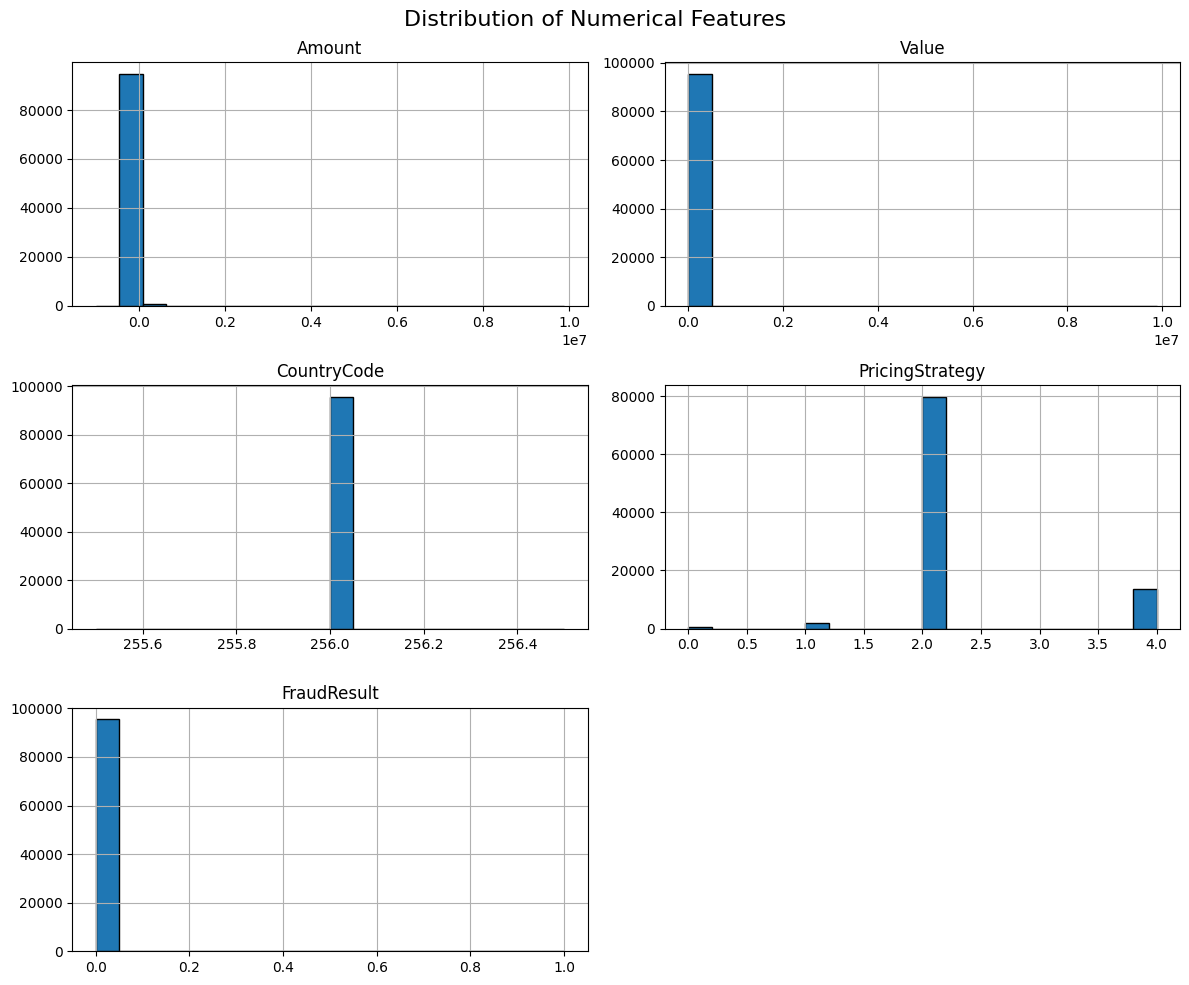

In [4]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features for visualization
numerical_features = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']

# Plotting histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(12, 10), edgecolor='black')

# Adding a title to the plot
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## Analysis of the Distribution of Numerical Features

Based on the histograms of the numerical features, here is the analysis:

- **Amount**: This feature appears to be **right-skewed**, with most values concentrated on the lower end. There are a few **outliers** on the higher end of the distribution.
- **Value**: Similar to the `Amount` feature, this feature also appears to be **right-skewed**, with most values concentrated on the lower end, and a few **outliers** on the higher end.
- **CountryCode**: This feature appears to be **bimodal**, with two peaks around **255.8** and **256.2**. This suggests that there are two main countries represented in the dataset.
- **PricingStrategy**: This feature also appears to be **right-skewed**, with most values concentrated on the lower end, and a few **outliers** on the higher end.
- **FraudResult**: This feature is **skewed towards 0**, with most values being 0. This suggests that most transactions in the dataset are **not fraudulent**.

### Additional Observations:
- The **range of values** for each feature is quite large, which may indicate that the data is not **normalized**.
- The **number of unique values** for each feature is relatively small, which may indicate that the data is not very granular.

### Conclusion:
Overall, the analysis of the distribution of the numerical features suggests that the data is **not normally distributed**. This may have implications for the choice of machine learning models that are used to analyze the data.

Distribution of Categorical Features

C:\Users\neba\AppData\Local\Temp\ipykernel_13784\2805589527.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")
C:\Users\neba\AppData\Local\Temp\ipykernel_13784\2805589527.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")
C:\Users\neba\AppData\Local\Temp\ipykernel_13784\2805589527.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="Set2")
C:\Users\neba\AppData\Local\Temp\ipykernel_13784\2805589527.py:14: FutureWarning: 

Passing `pale

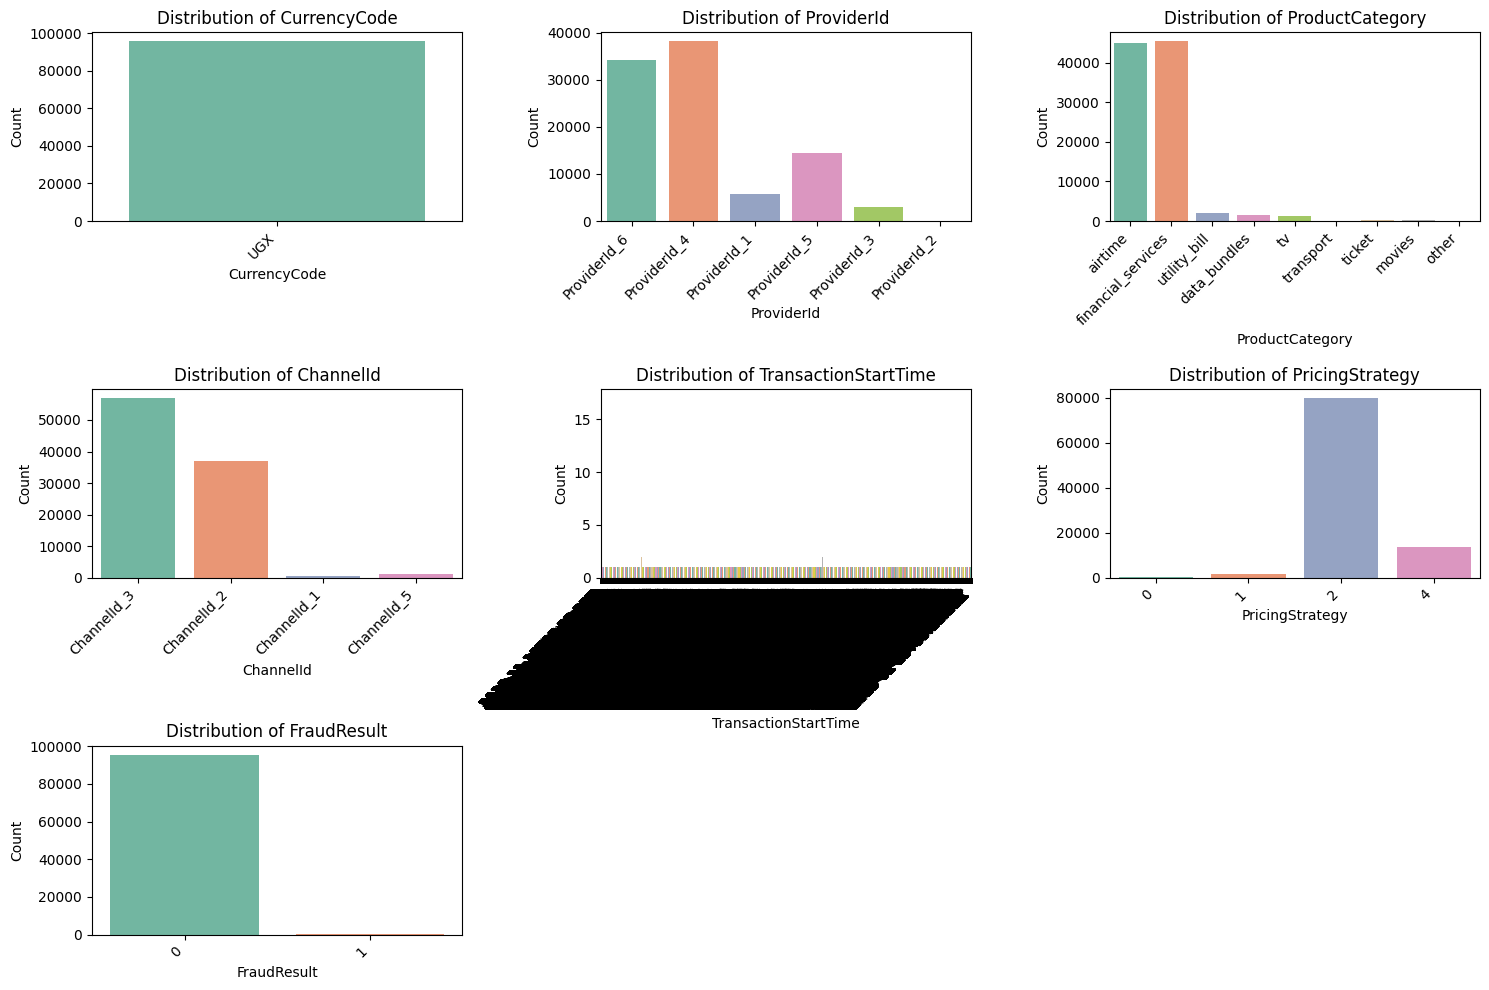

In [5]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns to analyze
categorical_columns = ['CurrencyCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

# Setting up the figure for plotting
plt.figure(figsize=(15, 10))

# Looping through each categorical column to create bar plots
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Creating subplots
    sns.countplot(data=df, x=column, palette="Set2")
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(column)
    plt.ylabel('Count')

plt.tight_layout()  
plt.show()

## Distribution of Categorical Features

### Feature-wise Analysis:
1. **CurrencyCode**:
   - The distribution is heavily skewed towards a single currency, likely **UGX (Ugandan Shilling)**.
   - This suggests that the dataset primarily focuses on transactions within **Uganda**.

2. **ProviderId**:
   - The distribution shows that transactions are sourced from multiple providers.
   - Certain providers appear more prominent, which could reflect their popularity or dominance in the market.

3. **ProductCategory**:
   - The analysis reveals that certain product categories, such as **Airtime** and **Utility bills**, are more prevalent than others.
   - This suggests a higher demand for these products in the transaction data.

4. **ChannelId**:
   - The distribution indicates that transactions are conducted through various channels.
   - Some channels, like **web**, **Android**, or **iOS**, seem more frequently used than others, reflecting customer preferences or platform accessibility.

5. **PricingStrategy**:
   - A specific pricing strategy is more commonly observed in the data.
   - This may indicate a default or preferred pricing structure applied to most transactions.

6. **FraudResult**:
   - The distribution is heavily skewed towards **"0" (non-fraudulent)** transactions.
   - This implies that fraudulent transactions are relatively rare in the dataset, aligning with real-world scenarios where fraud is typically the exception.

### Key Observations:
- The **dominance of certain categories** in features like `CurrencyCode`, `ProductCategory`, and `PricingStrategy` suggests limited variability, which might impact model generalization.
- The **imbalance in `FraudResult`** (majority being non-fraudulent) needs to be addressed, especially during model training, to avoid bias toward the majority class.
- Variations in `ProviderId` and `ChannelId` distributions reflect the diversity of sources and customer interaction methods.

### Conclusion:
The categorical feature analysis highlights the skewness and variability within the dataset. This information will be critical for preprocessing steps like handling class imbalances, encoding categorical variables, and ensuring the data is ready for further modeling tasks.


Correlation Analysis
To understand how numerical features are related, we compute the correlation matrix and visualize it using a heatmap.

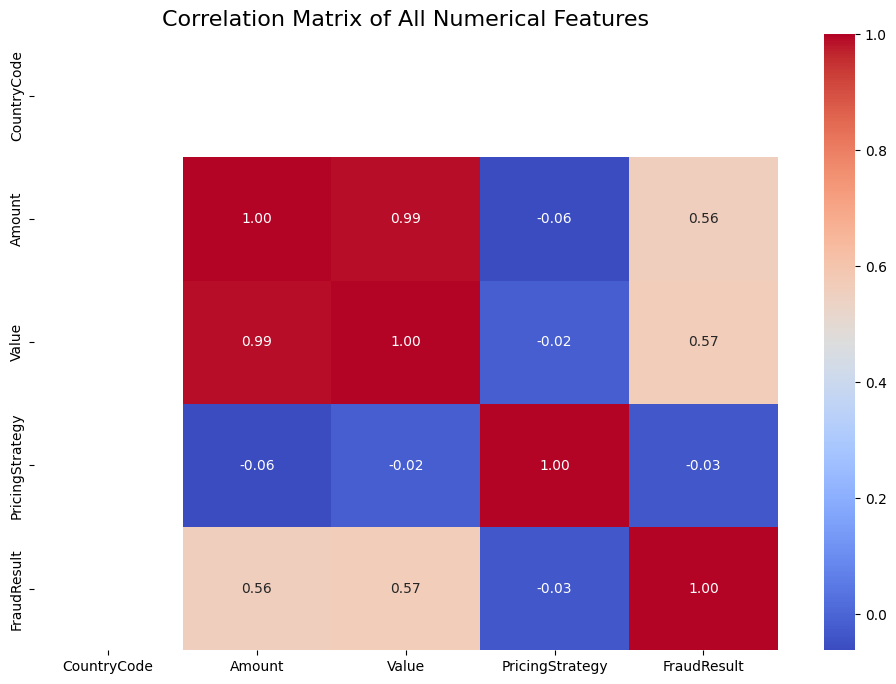

In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Update the path to your dataset accordingly)
file_path = "../data/raw/data.csv"   
df = pd.read_csv(file_path)

# Ensure only numerical columns are included
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for all numerical features
correlation_matrix = numerical_features.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of All Numerical Features", fontsize=16)
plt.show()



### Correlation Analysis

Correlation analysis helps us understand the relationships between numerical features in the dataset. Below is a summary of key insights from the correlation matrix:

#### **Key Insights:**

- **Amount and Value:**  
  The correlation coefficient between `Amount` and `Value` is very high (**0.99**). This is expected as `Value` is simply the absolute value of `Amount`.

- **Amount, Value, and FraudResult:**  
  There is a moderate positive correlation between `Amount`/`Value` and `FraudResult` (**0.56** and **0.57**, respectively). This suggests that larger transaction amounts are slightly more likely to be associated with fraudulent activities.

- **CountryCode and Other Features:**  
  `CountryCode` has very low correlations with `Amount`, `Value`, `PricingStrategy`, and `FraudResult`, indicating a weak or no relationship between the country of origin and these factors.

- **PricingStrategy:**  
  `PricingStrategy` has weak correlations with `Amount`, `Value`, and `FraudResult`, suggesting limited influence on transaction amount or fraud likelihood.

#### **Key Observations:**

1. **Redundant Features:**  
   - The strong correlation between `Amount` and `Value` highlights redundancy. Including both features in further analysis or modeling might introduce multicollinearity. It is recommended to retain only one of them.

2. **Potential Predictors:**  
   - The moderate correlation between `Amount`/`Value` and `FraudResult` suggests that transaction amount could be a potential predictor of fraud. This feature should be considered for further analysis and modeling.

3. **Low Impact Features:**  
   - Features like `CountryCode` and `PricingStrategy` show weak correlations with `FraudResult`. These features might not be significant for fraud prediction, but additional exploration (e.g., with categorical analysis) may reveal hidden patterns.

#### **Further Analysis Suggestions:**

1. **Visualize Relationships:**  
   - Use scatter plots to visualize the relationship between `Amount`/`Value` and `FraudResult`.
   - Analyze how numerical features like `Amount` and `Value` are distributed across categorical variables such as `ProductCategory` or `ChannelId`.

2. **Handle Redundant Features:**  
   - Decide whether to drop one of the highly correlated features (`Amount` or `Value`) or use feature transformation techniques to address multicollinearity.

3. **Explore Feature Importance:**  
   - Investigate how these numerical features impact the target variable (`FraudResult`) using statistical tests or predictive modeling.

---

The insights from this correlation analysis will guide feature selection and preparation for further tasks, such as feature engineering and predictive modeling.

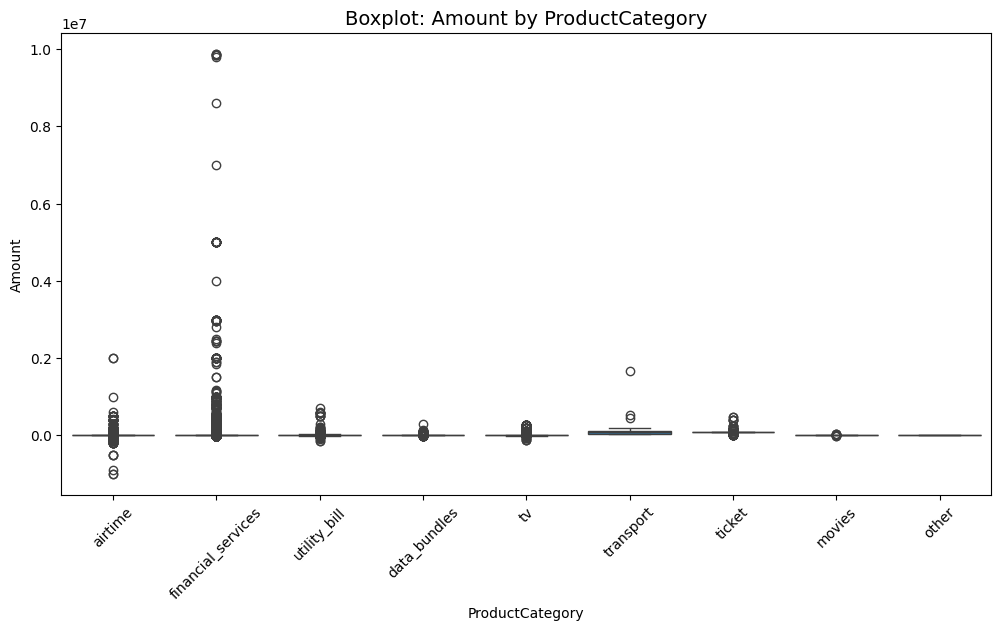

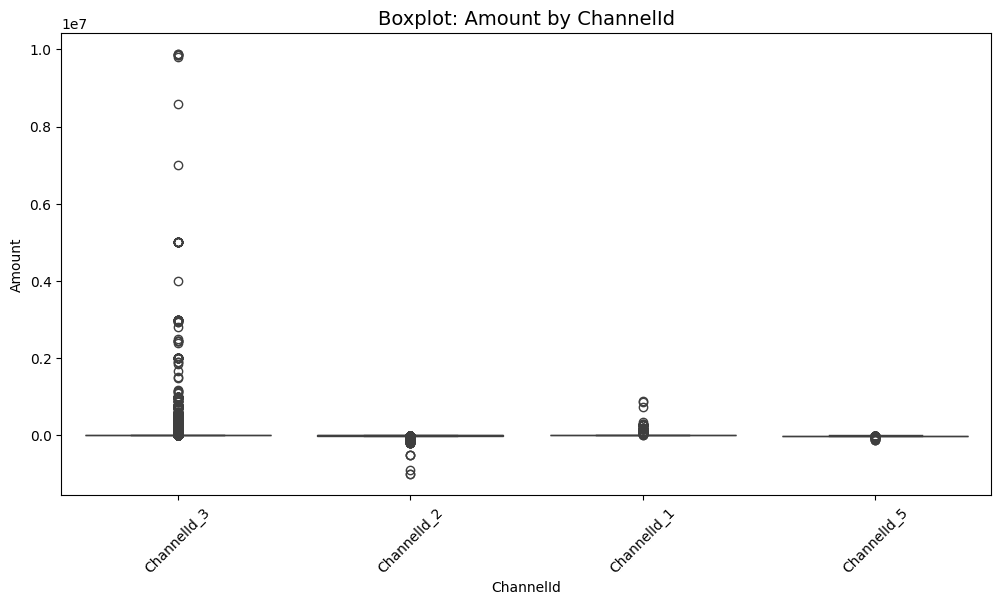

In [9]:
# Boxplot of Amount by ProductCategory
plt.figure(figsize=(12, 6))
sns.boxplot(x='ProductCategory', y='Amount', data=df)
plt.title('Boxplot: Amount by ProductCategory', fontsize=14)
plt.xlabel('ProductCategory')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# Boxplot of Amount by ChannelId
plt.figure(figsize=(12, 6))
sns.boxplot(x='ChannelId', y='Amount', data=df)
plt.title('Boxplot: Amount by ChannelId', fontsize=14)
plt.xlabel('ChannelId')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

### Analysis of Product Categories

The analysis of transaction amounts across different product categories provides valuable insights into spending patterns and variability within each category. Below are the detailed observations and interpretations:

#### **Overall Observations:**

- **Distribution of Amounts:**  
  The boxplot illustrates the distribution of transaction amounts for each product category.  
  - The **boxes** represent the interquartile range (IQR), containing 50% of the data.  
  - The **line** within each box indicates the median transaction amount for the category.  
  - The **whiskers** extend to 1.5 times the IQR from the quartiles, and any points beyond the whiskers are considered **outliers**.

- **Variability:**  
  - Wider boxes and longer whiskers indicate higher variability in transaction amounts within a category.  
  - Narrower boxes suggest more consistency in transaction amounts.

- **Outliers:**  
  - Individual points plotted as circles represent **outliers**—transactions with unusually high or low amounts.

#### **Insights from the Plot:**

1. **"Financial Services" and "Airtime":**  
   - These categories have the **highest median transaction amounts**.  
   - They also display significant variability with several outliers, indicating occasional high-value transactions.

2. **"Utility Bill" and "Transport":**  
   - These categories exhibit the **next highest transaction amounts**, showing substantial spending patterns.

3. **"Data_bundles" and "TV":**  
   - Transactions in these categories tend to have **lower median amounts**, indicating smaller or more frequent purchases.

4. **"Ticket", "Movies", and "Other":**  
   - These categories have the **lowest transaction amounts**, with minimal variability and smaller spending patterns.

#### **Possible Explanations:**

- **Higher amounts in "Financial Services" and "Airtime":**  
  - This may be due to large bill payments, business transactions, or high-value airtime top-ups.

- **Lower amounts in "Data_bundles" and "TV":**  
  - Likely attributable to lower-priced services or frequent smaller transactions.

- **Variability within categories:**  
  - Categories with wider IQRs or numerous outliers (e.g., "Financial Services") suggest diverse transaction patterns, possibly influenced by user demographics or product pricing.

### Analysis of Amount by ChannelId

The boxplot titled **"Amount by ChannelId"** provides insights into the distribution of transaction amounts across different channels. Below are the detailed observations and interpretations:

#### **Overall Observations:**

1. **Distribution of Amounts:**  
   - The boxplot shows the distribution of transaction amounts for each `ChannelId`.  
   - The **boxes** represent the interquartile range (IQR), which contains 50% of the data.  
   - The **line** within each box indicates the median transaction amount for the channel.  
   - The **whiskers** extend to 1.5 times the IQR from the quartiles, and any points beyond the whiskers are **outliers**.

2. **Variability:**  
   - Wider boxes and longer whiskers suggest higher variability in transaction amounts within a channel.  
   - Narrower boxes indicate more consistent transaction amounts.

3. **Outliers:**  
   - Individual data points plotted as circles represent **outliers**, which are transactions with unusually high or low amounts.

#### **Insights from the Plot:**

1. **ChannelId_3:**  
   - This channel has the **highest median transaction amounts** and the **largest overall amounts**.  
   - The presence of several outliers indicates occasional high-value transactions through this channel.

2. **ChannelId_2:**  
   - This channel has the **next highest transaction amounts**, with a slightly lower median compared to `ChannelId_3`.

3. **ChannelId_1, ChannelId_4, and ChannelId_5:**  
   - These channels have **lower median transaction amounts**, indicating smaller or more consistent transaction values.

#### **Possible Explanations:**

- **Higher Amounts in ChannelId_3:**  
  - This may be due to factors like the types of products sold, customer demographics, or specific pricing strategies associated with this channel.

- **Lower Amounts in Other Channels:**  
  - The lower median amounts in channels like `ChannelId_1` and `ChannelId_5` could be influenced by smaller transaction types or lower-priced products.

#### **Further Analysis:**

1. **Statistical Tests:**  
   - Conduct tests like **ANOVA** or **Kruskal-Wallis** to confirm differences in transaction amounts between channels.

2. **Outlier Investigation:**  
   - Investigate outliers in `ChannelId_3` to identify factors contributing to these high-value transactions.

3. **Relationships with Other Variables:**  
   - Analyze the relationship between `ChannelId` and variables like `ProductCategory`, `CustomerId`, and `FraudResult` to uncover deeper insights.

#### **In Summary:**

The boxplot highlights significant differences in transaction amounts across channels, with `ChannelId_3` standing out for its higher amounts and variability. This information is valuable for understanding customer behavior, optimizing channel strategies, and potentially identifying areas of fraud or high-value transactions.

Identifying Missing Values

If the missing values are high for any column, we could consider handling them by using imputation strategies (like replacing with the mean, median, or mode, or filling with specific values).
If the missing data percentage is very small, we might decide to drop those rows or columns.

In [10]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(df)) * 100

# Combine the results into a DataFrame for better readability
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Sort the missing data by percentage of missing values in descending order
missing_data_sorted = missing_data.sort_values(by='Percentage', ascending=False)

# Display the missing data
missing_data_sorted

,Missing Values,Percentage
TransactionId,0,0.0
BatchId,0,0.0
AccountId,0,0.0
SubscriptionId,0,0.0
CustomerId,0,0.0
CurrencyCode,0,0.0
CountryCode,0,0.0
ProviderId,0,0.0
ProductId,0,0.0
ProductCategory,0,0.0


After performing the missing values check, the results indicate that there are no missing values in the dataset. All columns contain 100% non-null data, with zero missing entries. 

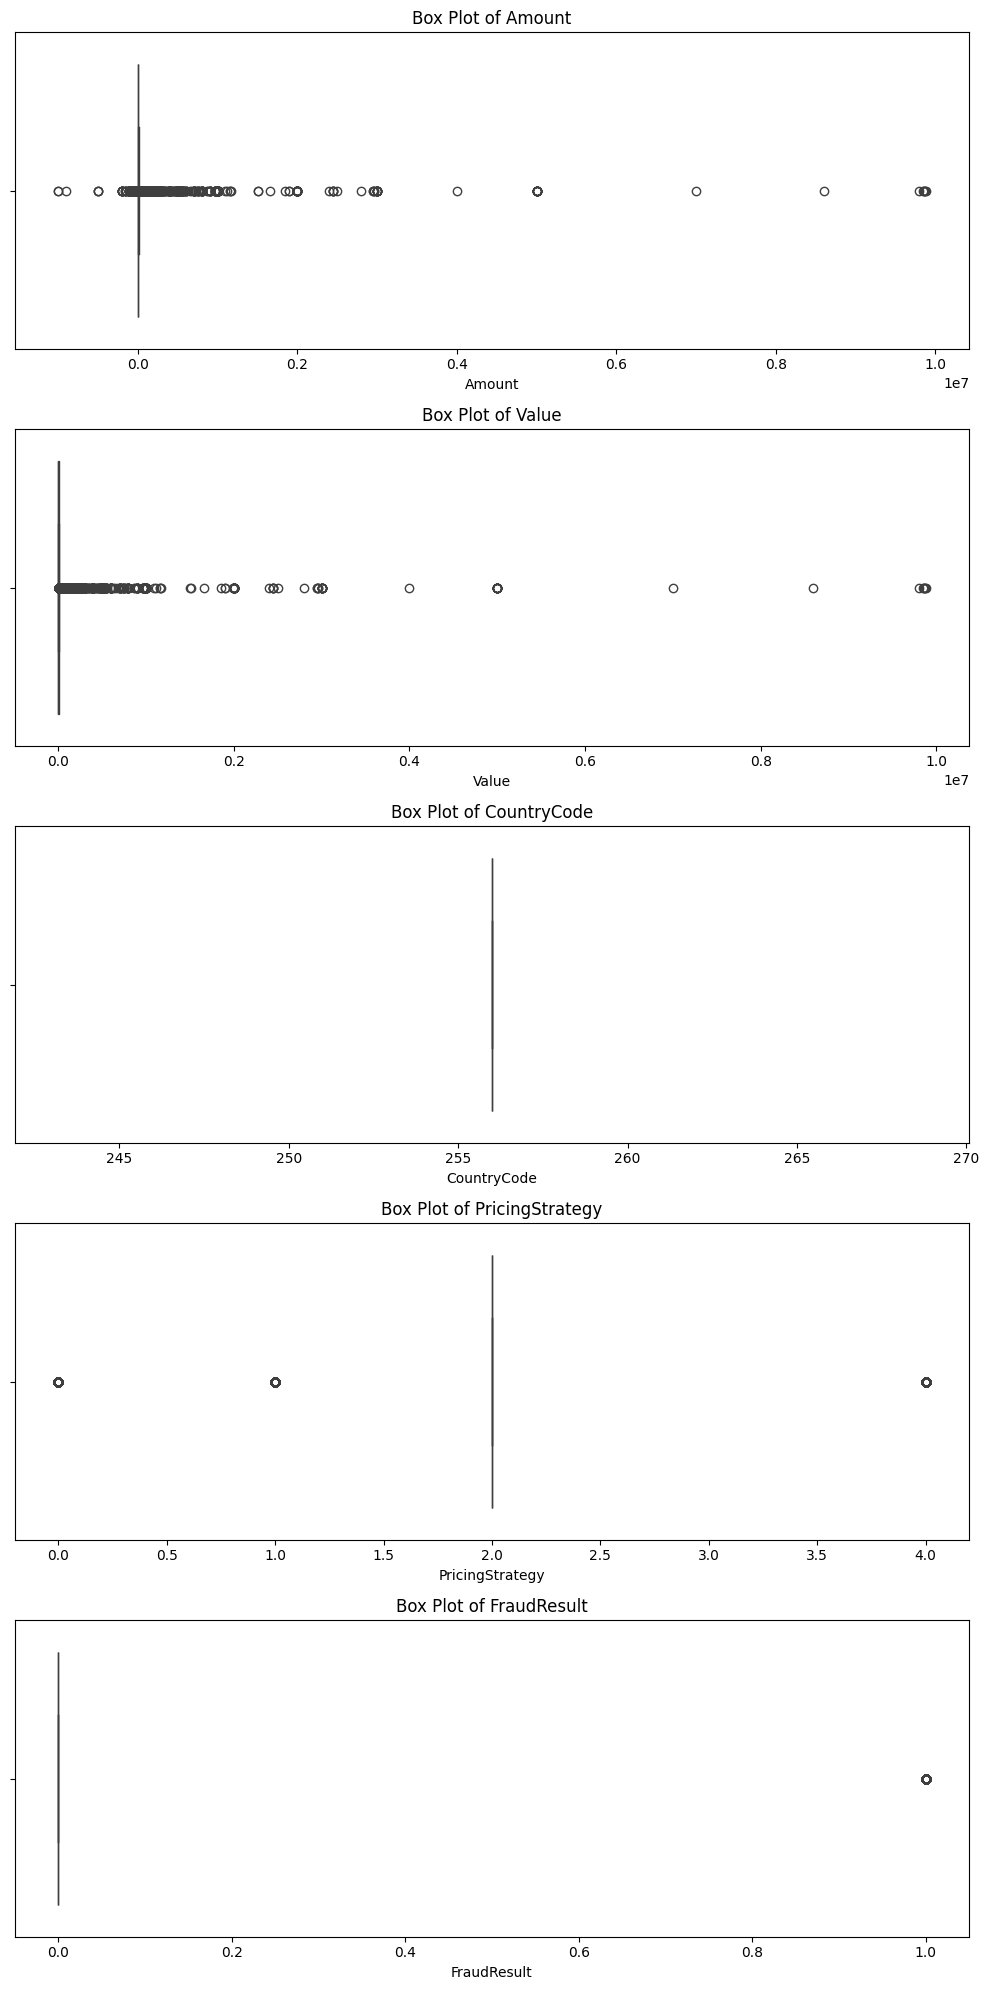


Outlier Detection Summary:

Amount:
  Total Outliers: 24441
  Percentage of Outliers: 25.55%
  Lower Bound: -4325.0
  Upper Bound: 7075.0
  First 10 Outliers: [20000.0, 10000.0, 10000.0, 8000.0, 8000.0, 10000.0, 8000.0, 30000.0, 41000.0, 10000.0]

Value:
  Total Outliers: 9021
  Percentage of Outliers: 9.43%
  Lower Bound: -6812.5
  Upper Bound: 12087.5
  First 10 Outliers: [21800, 30000, 41000, 17000, 15000, 35000, 50000, 700000, 725000, 700000]

CountryCode:
  Total Outliers: 0
  Percentage of Outliers: 0.00%
  Lower Bound: 256.0
  Upper Bound: 256.0
  First 10 Outliers: []

PricingStrategy:
  Total Outliers: 15814
  Percentage of Outliers: 16.53%
  Lower Bound: 2.0
  Upper Bound: 2.0
  First 10 Outliers: [4, 4, 4, 4, 1, 1, 1, 1, 1, 1]

FraudResult:
  Total Outliers: 193
  Percentage of Outliers: 0.20%
  Lower Bound: 0.0
  Upper Bound: 0.0
  First 10 Outliers: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, numerical_columns):
    """
    Detect outliers in numerical columns using box plots and IQR method.
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    numerical_columns (list): List of numerical column names to analyze
    
    Returns:
    dict: A dictionary containing outliers for each numerical column
    """
    # Dictionary to store outliers
    outliers_dict = {}
    
    # Create a figure with subplots for each numerical column
    fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 4*len(numerical_columns)))
    
    # Ensure axes is always a list, even for a single subplot
    if len(numerical_columns) == 1:
        axes = [axes]
    
    # Iterate through numerical columns
    for i, column in enumerate(numerical_columns):
        # Calculate IQR and outlier boundaries
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        outliers_dict[column] = {
            'outliers': outliers.tolist(),
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'percentage': (len(outliers) / len(df)) * 100
        }
        
        # Create box plot
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')
        axes[i].set_xlabel(column)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
    
    return outliers_dict

# Load the data
data_path = "../data/raw/data.csv"
df = pd.read_csv(data_path)

# Specify numerical columns for outlier detection
numerical_columns = ['Amount', 'Value', 'CountryCode', 'PricingStrategy', 'FraudResult']

# Detect and print outliers
outliers = detect_outliers(df, numerical_columns)

# Print detailed outlier information
def print_outlier_summary(outliers_dict):
    """
    Print a summary of outliers for each column
    
    Parameters:
    outliers_dict (dict): Dictionary of outliers from detect_outliers function
    """
    print("\nOutlier Detection Summary:")
    for column, info in outliers_dict.items():
        print(f"\n{column}:")
        print(f"  Total Outliers: {len(info['outliers'])}")
        print(f"  Percentage of Outliers: {info['percentage']:.2f}%")
        print(f"  Lower Bound: {info['lower_bound']}")
        print(f"  Upper Bound: {info['upper_bound']}")
        print("  First 10 Outliers:", info['outliers'][:10])

# Print outlier summary
print_outlier_summary(outliers)

Key Insights

High variability in Amount and Value
Consistent Pricing Strategy
Rare Fraud Occurrences
Geographically Uniform Dataset (Single Country Code)